# <center> Session-1 Tasks </center>

## Task-1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Grayscale implementation

(np.float64(-0.5), np.float64(275.5), np.float64(181.5), np.float64(-0.5))

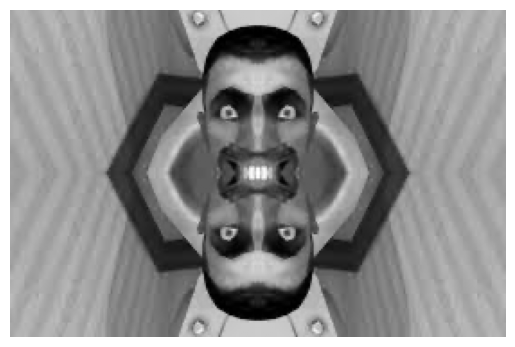

In [3]:
g_scale = Image.open("grayscale.png").convert("L")
g_scale = np.asarray(g_scale)

#Now we have our image as an array
#We'll now take the top left quadrant of that and try to apply the kaleidoscope transformation to it.

#Finding the number of rows and columns in our grayscale image
rows = len(g_scale)
columns = len(g_scale[0])

#getting the first quadrant
top_left = g_scale[:rows//2, :columns//2]

#getting the top_right (just the top_left flipped over the y-axis)
top_right = np.flip(top_left, 1)

#getting the complete top part by stacking the left and right
top = np.hstack([top_left,top_right])

#getting the bottom part by flipping the image
bottom = np.flip(top,0)

#getting the image by stacking the top and bottom part
transformed_grayscale_image = np.vstack([top,bottom])

#lets see our image
plt.imshow(transformed_grayscale_image, cmap="gray")
plt.axis("off")

In [4]:
#lets save our image (to use later <3)
transformed_grayscale = Image.fromarray(transformed_grayscale_image)
transformed_grayscale.save("transformed_grayscale.png")

Lets introduce colors too

(np.float64(-0.5), np.float64(275.5), np.float64(181.5), np.float64(-0.5))

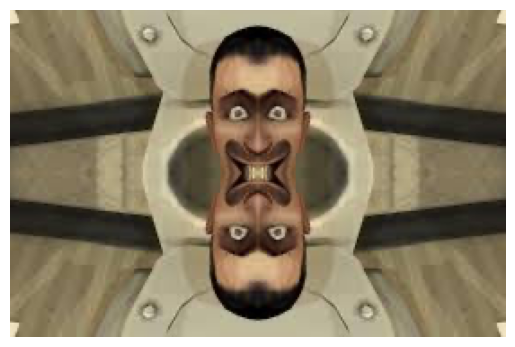

In [5]:
rgb = Image.open("rgb.png")
rgb = np.asarray(rgb)


#Finding the number of rows and columsn in the image
rows = len(rgb)
columns = len(rgb[0])

#getting the first quadrant
top_left = rgb[:rows//2, :columns//2,::]

#getting the top_right (just the top_left flipped over the y-axis)
top_right = np.flip(top_left, 1)

#getting the complete top part by stacking the left and right
top = np.hstack([top_left,top_right])

#getting the bottom part by flipping the image
bottom = np.flip(top,0)

#getting the image by stacking the top and bottom part
transformed_rgb_image = np.vstack([top,bottom])

#lets see our image
plt.imshow(transformed_rgb_image)
plt.axis("off")

In [6]:
#lets save our image (to use later <3)
transformed_rgb = Image.fromarray(transformed_rgb_image)
transformed_rgb.save("transformed_rgb.png")

## Task-2

Letsss Gooo

In [7]:
class Node:
    def __init__(self, value, op="init",op_args=[], children=[]):
        self.value = np.array(value)
        self.op = op
        self.op_args = op_args
        self.children = children
        self.grad = None

    def __add__(self, other):
        if(isinstance(other,Node)):
            return Node(self.value + other.value, op="add", children= [self,other])
        else:
            return Node(self.value+ other, op= "add", op_args=[None, other], children=[self])
    def __radd__(self, other):
        return Node(self.value + other, op="add", op_args=[other, None], children=[self])


    def __sub__(self, other):
        if(isinstance(other,Node)):
            return Node(self.value - other.value, op="sub", children= [self,other])
        else:
            return Node(self.value - other, "sub", [None, other], [self])
    def __rsub__(self, other):
        return Node(other- self.value, "sub", [other,None], children=[self])


    def __mul__(self, other):
        if(isinstance(other,Node)):
            return Node(self.value * other.value, "mul", children = [self,other])
        else:
            return Node(self.value * other, "mul", op_args=[None,other], children=[self])
    def __rmul__(self, other):
        return Node(self.value * other, "mul", op_args=[other, None], children=[self])


    def __truediv__(self, other):
        if(isinstance(other,Node)):
            return Node(self.value / other.value, "div", children= [self,other])
        else:
            return Node(self.value / other, "div", [None,other], [self])
    def __rtruediv__(self, other):
        return Node(other / self.value, "div", [other,None], [self])


    def __pow__(self,other):
        if(isinstance(other,Node)):
            return Node(self.value ** other.value, "pow", children= [self,other])
        else:
            return Node(self.value ** other, "pow", [None,other], [self])
    def __rpow__(self,other):
        return Node(other ** self.value, "pow", [other,None], [self])




    def __str__(self):
        print("--------")
        print(f"Value = {self.value}")
        print(f"Operation = {self.op}")
        print(f"Children1 = {[(child.value, child.op) for child in self.children]}")
        print(f"op_args = {[arg for arg in self.op_args]}")
        print("---------")
        return ""




    #Who doesn't love bonuses?
    #added the grad member
    def backward(self, prev_grad= None):

        #it is the output node
        if prev_grad == None:
            prev_grad = np.ones_like(self.value)

        #accumulate
        if self.grad == None:
            self.grad = (prev_grad)
        else:
            self.grad = self.grad + prev_grad



        #giving back to children
        if(self.op=="add"):
            for child in self.children:
                child.backward(self.grad) #simply give them back



        if(self.op=="sub"): # x - y
            if(len(self.children)==2):
                self.children[0].backward(self.grad) #wrt x it is positive
                self.children[1].backward(-self.grad) #wrt y it is negative

            elif(self.op_args[0] == None): # x - constant
                self.children[0].backward(self.grad) #only wrt x (which is +ve)

            else: # constant- x
                self.children[0].backward(-self.grad) #only wrt x (which is -ve here)



        if(self.op=="mul"): #x*y
            if(len(self.children)==2):
                self.children[0].backward(self.children[1].value * self.grad) #y * grad
                self.children[1].backward(self.children[0].value * self.grad) #x * grad

            elif(self.op_args[0] == None): # x * constant
                self.children[0].backward(self.op_args[1] * self.grad) # constant * grad

            else: # constant * x 
                self.children[0].backward(self.op_args[0] * self.grad) # constant * grad



        if(self.op=="div"): #x / y
            if(len(self.children) == 2):
                self.children[0].backward(self.grad / self.children[1].value) # wrt x = grad / y
                self.children[1].backward(- (self.grad * self.children[0].value) / (self.children[1].value **2)) # wrt y = - grad * x/ y**2

            elif(self.op_args[1] == None): # constant / x
                self.children[0].backward(- (self.grad * self.op_args[0]) / (self.children[0].value ** 2)) # -constant * grad / y**2
            else: #x / constant
                self.children[0].backward(self.grad / self.op_args[1]) # grad / constant


        if(self.op == "pow"):
            if(len(self.children) == 2): #x^y
                self.children[0].backward(self.grad * self.children[1].value * (self.children[0].value ** (self.children[1].value - 1))) #wrt x = y*x^(y-1) * grad
                self.children[1].backward(self.grad * self.value * np.log(self.children[0].value)) # wrt y = grad * x^y * ln(x)

            elif(self.op_args[1] == None): # constant ^ x
                self.children[0].backward(self.grad * self.value * np.log(self.children[0].value)) # grad * constant^x * ln(x)

            else: # x^constant
                self.children[0].backward(self.grad * self.op_args[1]* self.value / self.children[0].value) # grad* constant * x^(constant) / x


Lets calculate the required gradients as asked in the `Session1Tasks.pdf`

In [8]:
a = Node(1)
b = Node(3)

c = a*2 + b #5
d = c**3    #125

print(f"c = {c.value}")
print(f"d = {d.value}")

d.backward()

print(f"Gradient wrt a = {a.grad}")
print(f"Gradient wrt b = {b.grad}")
print(f"Gradient wrt c = {c.grad}")

c = 5
d = 125
Gradient wrt a = 150.0
Gradient wrt b = 75.0
Gradient wrt c = 75.0
